#Raw Data/Original

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
df=pd.read_csv('sarcasm_mal_train.csv')
dft=pd.read_csv('sarcasm_mal_test.csv')

In [ ]:
df

,Text,labels
0,ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ്ടും വീ...,Non-sarcastic
1,1:07 . ezhuthi kaanichathu kondu aaranennu man...,Non-sarcastic
2,"Uyyantaa moneee, ikkaa uyyyrrr",Sarcastic
3,K J Yesudas fans like here,Non-sarcastic
4,Bollywood moviyude oru feel തോന്നിയവർ ലൈക് അടി...,Non-sarcastic
...,...,...
12052,Ente UDUTHUNI kandillaaa...'nne parayunnathaar...,Sarcastic
12053,ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ലെവൽ ആകു...,Sarcastic
12054,Class kazhinju makkalee Ini ikkade mass kanam,Non-sarcastic
12055,I like madhura Raja trailer.so I make a versio...,Non-sarcastic


In [ ]:
dft

,Text,labels
0,നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞ...,Non-sarcastic
1,ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച പ്രതീക്...,Sarcastic
2,Jaison um keerthiyum super aanu .....aaa chir...,Non-sarcastic
3,1M+ VIEWS IN 19 Hrs 2M+ VIEWS IN 4 DAYS,Non-sarcastic
4,"addict ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ..... dailly, ...",Non-sarcastic
...,...,...
3010,Entammoooo lalettan clean shave look maarakam ...,Non-sarcastic
3011,Shane ninnodu abhinayikkana paranje allathe je...,Non-sarcastic
3012,yenthu chali annu bro ethu,Non-sarcastic
3013,Trailer polichu.... Ee trailerilum valutaanu c...,Non-sarcastic


In [ ]:
label_mapping = {"Non-sarcastic": 0, "Sarcastic": 1}
df['map'] = df['labels'].map(label_mapping)

In [ ]:
df

,Text,labels,map
0,ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ്ടും വീ...,Non-sarcastic,0
1,1:07 . ezhuthi kaanichathu kondu aaranennu man...,Non-sarcastic,0
2,"Uyyantaa moneee, ikkaa uyyyrrr",Sarcastic,1
3,K J Yesudas fans like here,Non-sarcastic,0
4,Bollywood moviyude oru feel തോന്നിയവർ ലൈക് അടി...,Non-sarcastic,0
...,...,...,...
12052,Ente UDUTHUNI kandillaaa...'nne parayunnathaar...,Sarcastic,1
12053,ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ലെവൽ ആകു...,Sarcastic,1
12054,Class kazhinju makkalee Ini ikkade mass kanam,Non-sarcastic,0
12055,I like madhura Raja trailer.so I make a versio...,Non-sarcastic,0


In [ ]:
label_mapping = {"Non-sarcastic": 0, "Sarcastic": 1}
dft['map'] = dft['labels'].map(label_mapping)

In [ ]:
dft

,Text,labels,map
0,നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞ...,Non-sarcastic,0
1,ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച പ്രതീക്...,Sarcastic,1
2,Jaison um keerthiyum super aanu .....aaa chir...,Non-sarcastic,0
3,1M+ VIEWS IN 19 Hrs 2M+ VIEWS IN 4 DAYS,Non-sarcastic,0
4,"addict ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ..... dailly, ...",Non-sarcastic,0
...,...,...,...
3010,Entammoooo lalettan clean shave look maarakam ...,Non-sarcastic,0
3011,Shane ninnodu abhinayikkana paranje allathe je...,Non-sarcastic,0
3012,yenthu chali annu bro ethu,Non-sarcastic,0
3013,Trailer polichu.... Ee trailerilum valutaanu c...,Non-sarcastic,0


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cntv=CountVectorizer()
tfidf=TfidfVectorizer()

In [ ]:
X_train=tfidf.fit_transform(df['Text']).toarray()
Y_train=df.iloc[:,2].values

In [ ]:
X_test=tfidf.transform(dft['Text']).toarray()
Y_test=dft.iloc[:,2].values

In [ ]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(12057, 12057, 3015, 3015)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
y_pred_1=mnb.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=4)

In [ ]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=4)

In [ ]:
y_pred_2=rfc.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred_4=lr.predict(X_test)

In [ ]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

In [ ]:
svc.fit(X_train,Y_train)

LinearSVC()

In [ ]:
y_pred_3=svc.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=23)

In [ ]:
y_pred_5=tree.predict(X_test)

##Classification Report for all models

In [ ]:
print("Naive_Bayes")
print(classification_report(Y_test, y_pred_1))

print("Random_Forest")
print(classification_report(Y_test, y_pred_2))

print("Logistic Regression")
print(classification_report(Y_test, y_pred_4))

print("Linear_SVC")
print(classification_report(Y_test, y_pred_3))

print("Decision Tree")
print(classification_report(Y_test, y_pred_5))

Naive_Bayes
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2427
           1       0.81      0.02      0.04       588

    accuracy                           0.81      3015
   macro avg       0.81      0.51      0.47      3015
weighted avg       0.81      0.81      0.73      3015

Random_Forest
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2427
           1       0.74      0.19      0.31       588

    accuracy                           0.83      3015
   macro avg       0.79      0.59      0.61      3015
weighted avg       0.82      0.83      0.79      3015

Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2427
           1       0.72      0.22      0.34       588

    accuracy                           0.83      3015
   macro avg       0.78      0.60      0.62      3015
weighted avg       0.82     

##Confusion Matrix

[[2424    3]
 [ 575   13]]


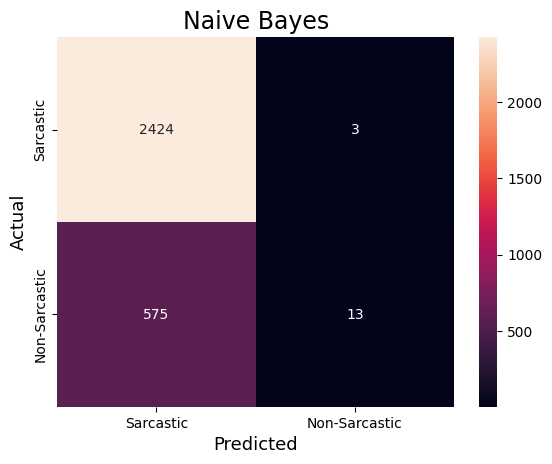

[[2387   40]
 [ 474  114]]


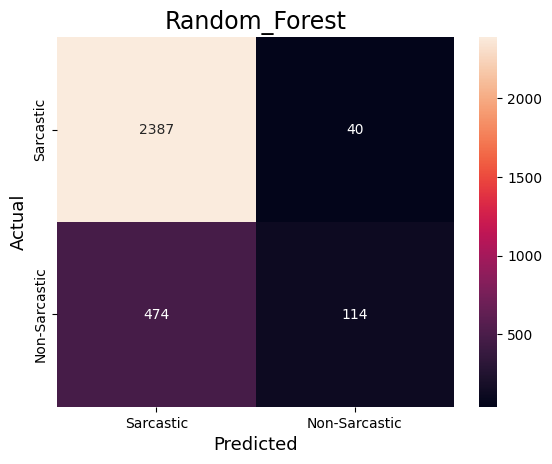

[[2281  146]
 [ 372  216]]


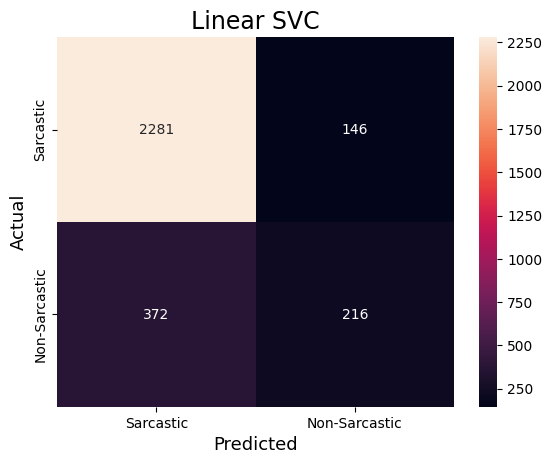

[[2375   52]
 [ 456  132]]


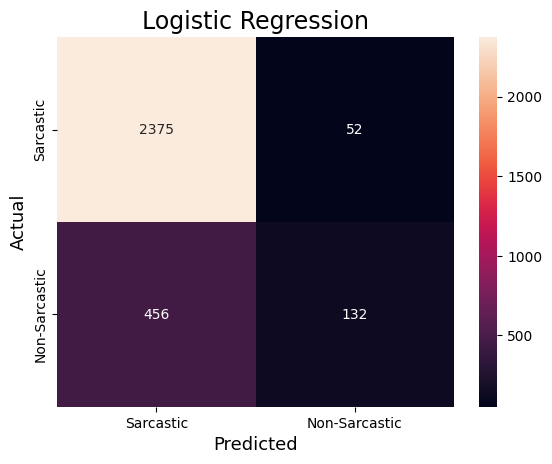

[[2148  279]
 [ 383  205]]


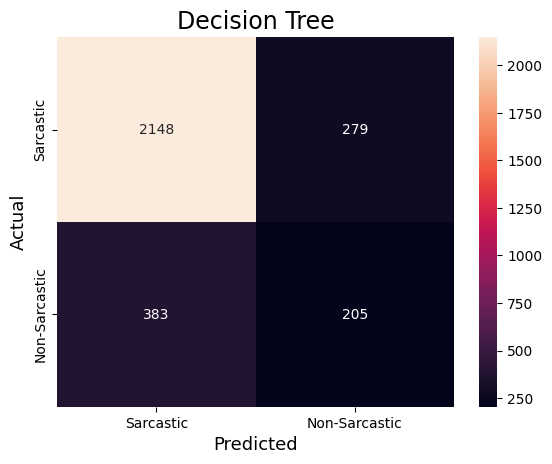

In [ ]:
cm1=confusion_matrix(Y_test,y_pred_1)
cm2=confusion_matrix(Y_test,y_pred_2)
cm3=confusion_matrix(Y_test,y_pred_3)
cm4=confusion_matrix(Y_test,y_pred_4)
cm5=confusion_matrix(Y_test,y_pred_5)

print(cm1);
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Naive Bayes',fontsize=17)
plt.show()

print(cm2)
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Random_Forest',fontsize=17)
plt.show()

print(cm3);
sns.heatmap(cm3,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Linear SVC',fontsize=17)
plt.show()

print(cm4);
sns.heatmap(cm4,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Logistic Regression',fontsize=17)
plt.show()

print(cm5);
sns.heatmap(cm5,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Decision Tree',fontsize=17)
plt.show()

##AOC - ROC Curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_auc_score

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import RocCurveDisplay

Naive_Bayes
ROC_AUC_SCORE :  0.7943122861010907


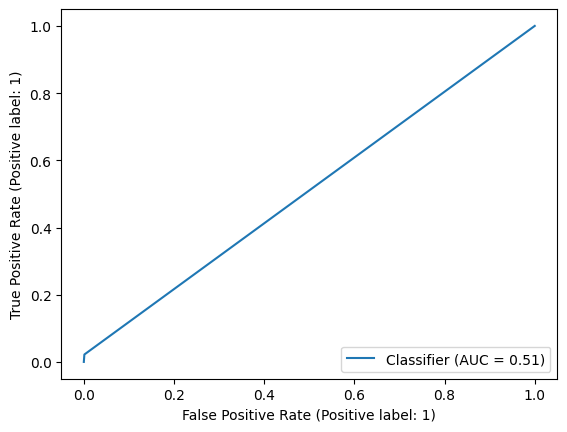

Random_Forest
ROC_AUC_SCORE :  0.7819096530247864


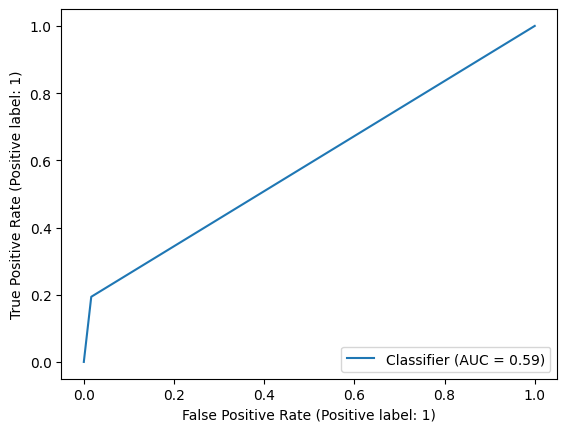

Logistic Regression
ROC_AUC_SCORE :  0.8043916371657851


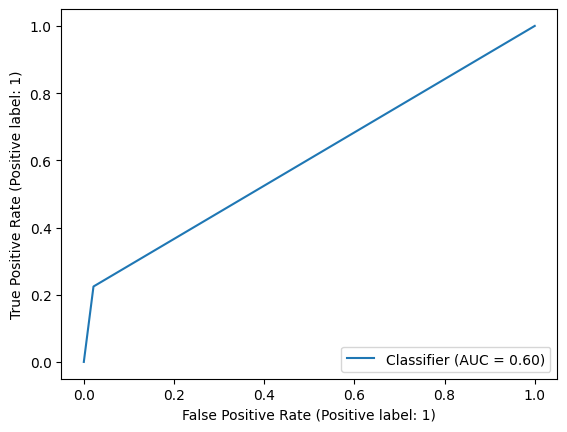

Decision Tree
ROC_AUC_SCORE :  0.6211014690177679


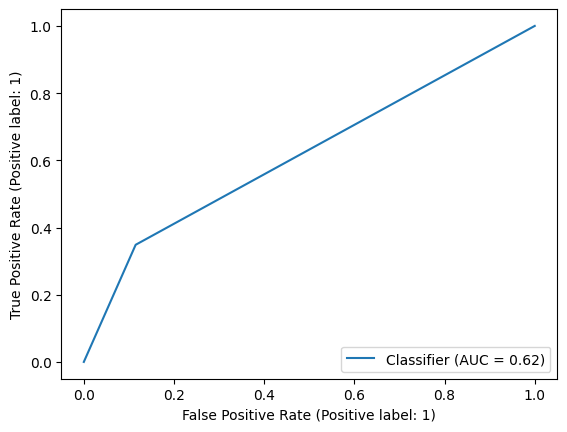

In [ ]:
print("Naive_Bayes")
print('ROC_AUC_SCORE : ',roc_auc_score(Y_test,mnb.predict_proba(X_test)[:, 1]))
RocCurveDisplay.from_predictions(Y_test, y_pred_1)
plt.show()

print("Random_Forest")
print('ROC_AUC_SCORE : ',roc_auc_score(Y_test,rfc.predict_proba(X_test)[:, 1]))
RocCurveDisplay.from_predictions(Y_test, y_pred_2)
plt.show()

print("Logistic Regression")
print('ROC_AUC_SCORE : ',roc_auc_score(Y_test,lr.predict_proba(X_test)[:, 1]))
RocCurveDisplay.from_predictions(Y_test, y_pred_4)
plt.show()

print("Decision Tree")
print('ROC_AUC_SCORE : ',roc_auc_score(Y_test,tree.predict_proba(X_test)[:, 1]))
RocCurveDisplay.from_predictions(Y_test, y_pred_5)
plt.show()

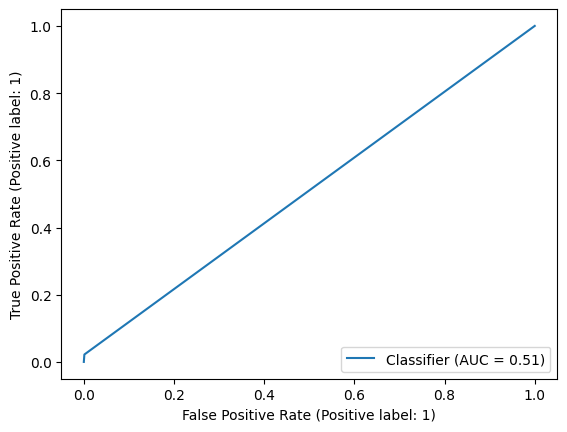

#Translated to English

In [10]:
df1 = pd.read_csv("Translated_MtoE.csv")
df2=pd.read_csv("Translated_MtoE_test.csv")

In [11]:
df1

,,Text,labels,malyalam_text,mtext,map,translated_text
0,0,ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ്ടും വീ...,Non-sarcastic,{'ml': 'ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ...,ആദ്യം കേട്ടിട്ട് ഇഷ്ടായില്ല ഇപ്പൊ വീണ്ടും വീ...,0,"I didn't like it when I first heard it, now I ..."
1,1,1:07 . ezhuthi kaanichathu kondu aaranennu man...,Non-sarcastic,{'ml': '൧:൦൭ . എഴുതി കാണിച്ചത് കൊണ്ട് ആരാണെന്ന...,൧:൦൭ . എഴുതി കാണിച്ചത് കൊണ്ട് ആരാണെന്ന് മനസിലായി,0,1:07. I understood who it was because it was w...
2,2,"Uyyantaa moneee, ikkaa uyyyrrr",Sarcastic,"{'ml': 'ഉയ്യന്റാ മോണി, ഇക്കാ ഉയ്യർർ'}","ഉയ്യന്റാ മോണി, ഇക്കാ ഉയ്യർർ",1,"Uyanta Moni, Ika Uyarr"
3,3,K J Yesudas fans like here,Non-sarcastic,{'ml': 'കെ ജെ യേശുദാസ് ഫാൻസ് ലൈക്ക് ഹെയർ'},കെ ജെ യേശുദാസ് ഫാൻസ് ലൈക്ക് ഹെയർ,0,KJ Yesudas fans like hair
4,4,Bollywood moviyude oru feel തോന്നിയവർ ലൈക് അടി...,Non-sarcastic,{'ml': 'ബോളിവുഡ് മൂവിയുടെ ഒരു ഫീൽ തോന്നിയവർ ലൈ...,ബോളിവുഡ് മൂവിയുടെ ഒരു ഫീൽ തോന്നിയവർ ലൈക് അടിക്ക്,0,"Those who felt a feeling of Bollywood movie, c..."
...,...,...,...,...,...,...,...
12052,12052,Ente UDUTHUNI kandillaaa...'nne parayunnathaar...,Sarcastic,"{'ml': ""എന്റെ ഉടുതുണി കണ്ടില്ലാ...'ന്നെ പറയുന്...",എന്റെ ഉടുതുണി കണ്ടില്ലാ...'ന്നെ പറയുന്നതാരുന്ന...,1,"You don't see my clothes...'Whoever tells me, ..."
12053,12053,ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ലെവൽ ആകു...,Sarcastic,{'ml': 'ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ...,ഈ മൂന്ന് അക്ഷരം മതി ദിലീപ് സിനിമ വേറെ ലെവൽ ആകു...,1,"These three letters are enough, Dileep's movie..."
12054,12054,Class kazhinju makkalee Ini ikkade mass kanam,Non-sarcastic,{'ml': 'ക്ലാസ് കഴിഞ്ഞു മക്കളേ ഇനി ഇക്കടെ മാസ് ...,ക്ലാസ് കഴിഞ്ഞു മക്കളേ ഇനി ഇക്കടെ മാസ് കനം,0,"Class is over, children, now it's mass"
12055,12055,I like madhura Raja trailer.so I make a versio...,Non-sarcastic,{'ml': 'ഇ ലൈക്ക് മധുര രാജ ട്രെയിലർ.സോ ഇ മേക്ക്...,ഇ ലൈക്ക് മധുര രാജ ട്രെയിലർ.സോ ഇ മേക്ക് അ വേർഷൻ...,0,E Like Madura Raja Trailer.So E Make A Version...


In [12]:
df2

,Text,labels,malyalam_text,mtext,map,translated_text
0,നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞ...,Non-sarcastic,{'ml': 'നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയി...,നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞ...,0,I did not become an actor because you worshipe...
1,ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച പ്രതീക്...,Sarcastic,{'ml': 'ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച...,ശ്ശെ ...!! അനു ചേച്ചി വിത്ത് മുലക്കച്ച പ്രതീക്...,1,Shhh...!! Anu chechi was expecting seed milk
2,Jaison um keerthiyum super aanu .....aaa chir...,Non-sarcastic,{'ml': 'ജെയ്സൺ ഉം കീർത്തിയും സൂപ്പർ ആണ് ........,ജെയ്സൺ ഉം കീർത്തിയും സൂപ്പർ ആണ് .....ആ ചിരി പ...,0,Jason and Keerthy are super.....those laughs w...
3,1M+ VIEWS IN 19 Hrs 2M+ VIEWS IN 4 DAYS,Non-sarcastic,{'ml': '൧എം+ വ്യൂസ് ഇൻ ൧൯ ഹർസ് ൨എം+ വ്യൂസ് ഇൻ ...,൧എം+ വ്യൂസ് ഇൻ ൧൯ ഹർസ് ൨എം+ വ്യൂസ് ഇൻ ൪ ഡേയ്സ്,0,1M+ Views in 19 Hours 2M+ Views in 4 Days
4,"addict ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ..... dailly, ...",Non-sarcastic,{'ml': 'അഡിക്ട് ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ........,"അഡിക്ട് ആവാനുള്ളതൊന്നും ഇല്ല ഇതിൽ..... ഡെയ്ലി,...",0,"There is nothing to be addicted to.....Daily, ..."
...,...,...,...,...,...,...
3010,Entammoooo lalettan clean shave look maarakam ...,Non-sarcastic,{'ml': 'എന്റമ്മൂഓ ലാലേട്ടൻ ക്ലീൻ ഷേവ് ലുക്ക് മ...,എന്റമ്മൂഓ ലാലേട്ടൻ ക്ലീൻ ഷേവ് ലുക്ക് മാരകം കട്...,0,Entammooo Laletan Clean Shave Look Marakam Kat...
3011,Shane ninnodu abhinayikkana paranje allathe je...,Non-sarcastic,{'ml': 'ഷെയ്ൻ നിന്നോട് അഭിനയിക്കണ പറഞ്ഞേ അല്ലാ...,ഷെയ്ൻ നിന്നോട് അഭിനയിക്കണ പറഞ്ഞേ അല്ലാതെ ജീവിക...,0,"Shane asked you to act and not to live, love y..."
3012,yenthu chali annu bro ethu,Non-sarcastic,{'ml': 'എന്തു ചാലി അന്നു ബ്രോ എത്തു'},എന്തു ചാലി അന്നു ബ്രോ എത്തു,0,Bro arrived that day
3013,Trailer polichu.... Ee trailerilum valutaanu c...,Non-sarcastic,{'ml': 'ട്രെയിലർ പൊളിച്ചു.... ഇഇ ട്രെയിലറിലും ...,ട്രെയിലർ പൊളിച്ചു.... ഇഇ ട്രെയിലറിലും വലുട്ടാണ...,0,The trailer has been released.... The movie is...


###ML Model

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cntv=CountVectorizer()
tfidf=TfidfVectorizer()

In [14]:
X_train=tfidf.fit_transform(df1['translated_text']).toarray()
Y_train=df1.iloc[:,5].values

In [15]:
X_test=tfidf.transform(df2['translated_text']).toarray()
Y_test=df2.iloc[:,4].values

In [16]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(12057, 12057, 3015, 3015)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=4)

In [18]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=4)

In [19]:
y_predt_1=rfc.predict(X_test)

In [20]:
print("Random_Forest")
print(classification_report(Y_test, y_predt_1))

Random_Forest
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2427
           1       0.85      0.23      0.37       588

    accuracy                           0.84      3015
   macro avg       0.85      0.61      0.64      3015
weighted avg       0.84      0.84      0.80      3015



In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [22]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [23]:
y_predt_2=lr.predict(X_test)

In [24]:
print("Logistic Regression")
print(classification_report(Y_test, y_predt_2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2427
           1       0.83      0.33      0.47       588

    accuracy                           0.86      3015
   macro avg       0.85      0.66      0.69      3015
weighted avg       0.85      0.86      0.83      3015



[[2403   24]
 [ 451  137]]


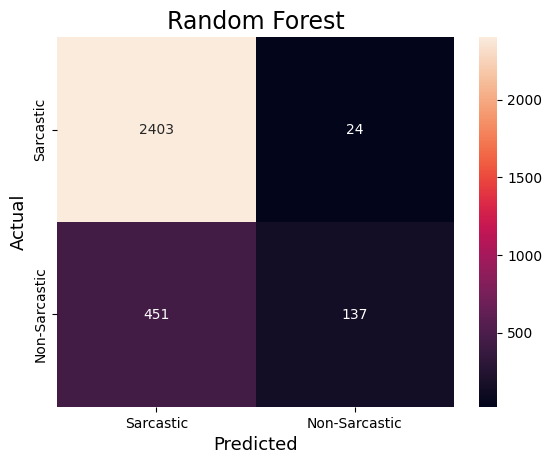

[[2388   39]
 [ 394  194]]


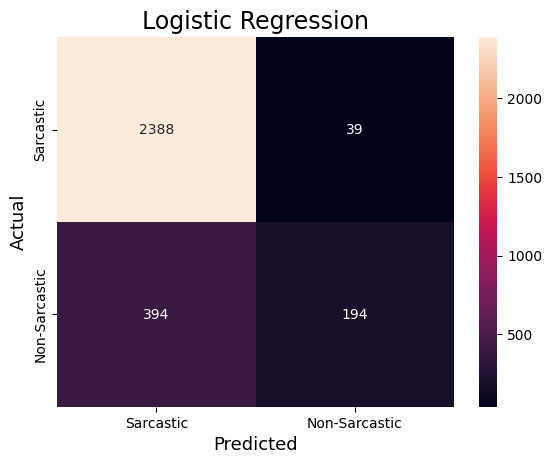

In [113]:
cm1=confusion_matrix(Y_test,y_predt_1)
cm2=confusion_matrix(Y_test,y_predt_2)

print(cm1);
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Random Forest',fontsize=17)
plt.show()

print(cm2)
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Logistic Regression',fontsize=17)
plt.show()

### CNN

In [28]:
X_train=df1['translated_text'].values


In [ ]:
X_train

In [30]:
Y_train=df1.iloc[:,5].values

In [ ]:
Y_train

In [32]:
X_test=df2['translated_text'].values

In [33]:
Y_test=df2.iloc[:,4].values

In [ ]:
Y_test

In [35]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [36]:
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [37]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

13

In [38]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 13 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [39]:
text_vectorizer.adapt(X_train)

In [40]:
sample_sentence = "നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞാൻ നടനായത്"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 13), dtype=int64, numpy=array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])>

In [41]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [42]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["നീയൊക്കെ ആരാധിച്ചു ആരാധിച്ചു വളർത്തിയിട്ടല്ല ഞാൻ നടനായത്"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important

In [43]:
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 13, 128]), TensorShape([1, 9, 32]), TensorShape([1, 32]))

In [45]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_1_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.Conv1D(filters=8, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_Conv1D")

# Compile Conv1D model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_1.summary()

Model: "model_1_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 13)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 32)             20512     
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 8)              1288      
                                                                 
 global_max_pooling1d_2 (Gl  (None, 8)                 0         
 obalMaxPooling1D)                                  

In [46]:
# Fit the model
model_1_history = model_1.fit(X_train,Y_train,
                              epochs=5,
                              validation_data=(X_test, Y_test))

Epoch 1/5
377/377 [==============================] - 15s 29ms/step - loss: 0.4441 - accuracy: 0.8186 - val_loss: 0.3986 - val_accuracy: 0.8358
Epoch 2/5
377/377 [==============================] - 3s 8ms/step - loss: 0.3050 - accuracy: 0.8753 - val_loss: 0.3938 - val_accuracy: 0.8391
Epoch 3/5
377/377 [==============================] - 4s 10ms/step - loss: 0.1975 - accuracy: 0.9246 - val_loss: 0.4800 - val_accuracy: 0.8355
Epoch 4/5
377/377 [==============================] - 6s 15ms/step - loss: 0.1157 - accuracy: 0.9568 - val_loss: 0.5500 - val_accuracy: 0.8182
Epoch 5/5
377/377 [==============================] - 4s 10ms/step - loss: 0.0653 - accuracy: 0.9765 - val_loss: 0.7800 - val_accuracy: 0.8279


In [98]:
model_1_pred_probs = model_1.predict(X_test)

95/95 [==============================] - 0s 4ms/step


In [48]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))


In [49]:
y_pred=model_1_preds.numpy()

In [50]:
y_pred=y_pred.astype(int)

In [51]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [52]:
Y_test

array([0, 1, 0, ..., 0, 0, 1])

In [53]:
print("CNN")
print(classification_report(Y_test, y_pred))

CNN
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2427
           1       0.58      0.42      0.49       588

    accuracy                           0.83      3015
   macro avg       0.72      0.67      0.69      3015
weighted avg       0.81      0.83      0.82      3015



[[2248  179]
 [ 340  248]]


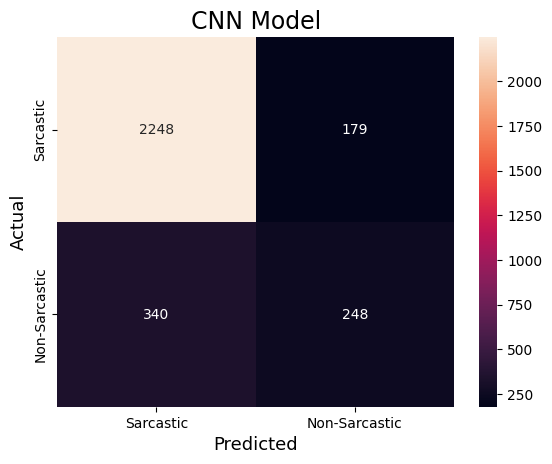

In [54]:
cm1=confusion_matrix(Y_test,y_pred)

print(cm1);
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('CNN Model',fontsize=17)
plt.show()

###Sentence Encoder

In [94]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [95]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [96]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(X_train,
                              Y_train,
                              epochs=5,
                              validation_data=(X_test, Y_test))

Epoch 1/5
377/377 [==============================] - 13s 19ms/step - loss: 0.4386 - accuracy: 0.8266 - val_loss: 0.4096 - val_accuracy: 0.8355
Epoch 2/5
377/377 [==============================] - 6s 17ms/step - loss: 0.3890 - accuracy: 0.8439 - val_loss: 0.4019 - val_accuracy: 0.8405
Epoch 3/5
377/377 [==============================] - 5s 14ms/step - loss: 0.3778 - accuracy: 0.8492 - val_loss: 0.3992 - val_accuracy: 0.8408
Epoch 4/5
377/377 [==============================] - 6s 17ms/step - loss: 0.3679 - accuracy: 0.8522 - val_loss: 0.3969 - val_accuracy: 0.8421
Epoch 5/5
377/377 [==============================] - 5s 14ms/step - loss: 0.3590 - accuracy: 0.8566 - val_loss: 0.3977 - val_accuracy: 0.8421


In [99]:
model_6_pred_probs = model_6.predict(X_test)

95/95 [==============================] - 1s 10ms/step


In [100]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))


In [107]:
y_pred_2=model_6_preds.numpy()

In [108]:
y_pred_2=y_pred.astype(int)

In [109]:
y_pred_2

array([0, 0, 1, ..., 0, 0, 0])

In [110]:
Y_test

array([0, 1, 0, ..., 0, 0, 1])

In [111]:
print("Pretrained Sentence Encoder")
print(classification_report(Y_test, y_pred_2))

Pretrained Sentence Encoder
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2427
           1       0.68      0.36      0.47       588

    accuracy                           0.84      3015
   macro avg       0.77      0.66      0.69      3015
weighted avg       0.83      0.84      0.82      3015



[[2326  101]
 [ 375  213]]


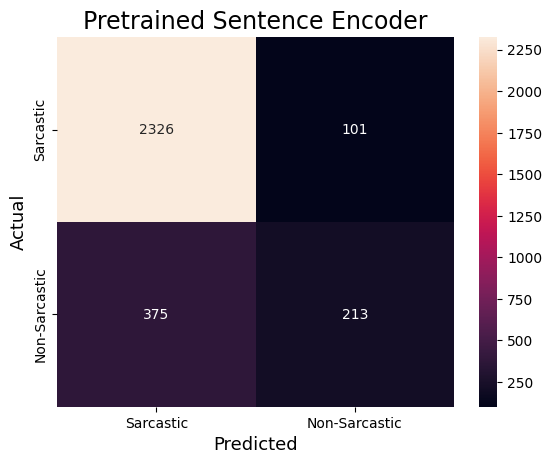

In [112]:
cm2=confusion_matrix(Y_test,y_pred_2)

print(cm2);
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Pretrained Sentence Encoder',fontsize=17)
plt.show()

###Bert Model

In [ ]:
!pip install tensorflow_text

In [56]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [57]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [82]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output3")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [83]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [84]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [85]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [86]:
model.fit(X_train, Y_train, epochs=2)

Epoch 1/2
377/377 [==============================] - 131s 335ms/step - loss: 0.4782 - accuracy: 0.8123
Epoch 2/2
377/377 [==============================] - 134s 356ms/step - loss: 0.4627 - accuracy: 0.8131


In [87]:
model_pred_probs = model.predict(X_test)

95/95 [==============================] - 37s 378ms/step


In [88]:
model_preds = tf.squeeze(tf.round(model_pred_probs))


In [89]:
y_pred_2=model_preds.numpy()

In [90]:
y_pred_2=y_pred_2.astype(int)

In [91]:
y_pred_2

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
print("m-bert Model")
print(classification_report(Y_test, y_pred_2))

m-bert Model
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2427
           1       1.00      0.00      0.01       588

    accuracy                           0.81      3015
   macro avg       0.90      0.50      0.45      3015
weighted avg       0.84      0.81      0.72      3015



[[2427    0]
 [ 586    2]]


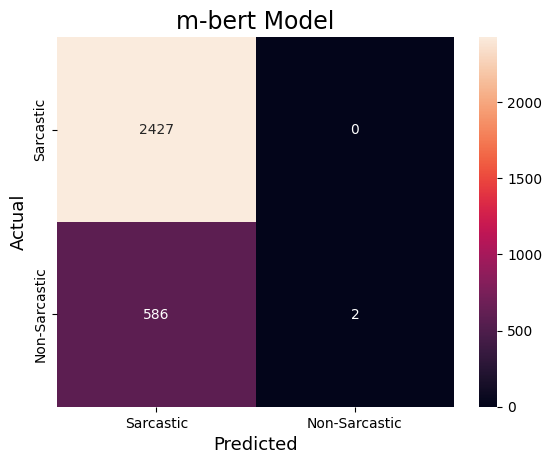

In [93]:
cm2=confusion_matrix(Y_test,y_pred_2)

print(cm2);
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['Sarcastic','Non-Sarcastic'],
            yticklabels=['Sarcastic','Non-Sarcastic'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('m-bert Model',fontsize=17)
plt.show()